This iPython notebook is my code implementation for the Laon Prediction problem at AnalyticsVidhya. I just used one xgboost model without any ensemble- .7916 is the public leaderboard score 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv(r"/home/rahul/ml_stuff/AV/loan prediction 3/train_u6lujuX_CVtuZ9i.csv")
del train["Loan_ID"]

In [4]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [6]:
train.shape

(614, 12)

In [106]:
train.describe()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
count,601.000000,601.000000,601.000000,601.000000,601.000000,579.000000,587.000000,601.000000,601.000000,601.000000,601.000000
mean,0.815308,0.652246,0.222962,4902.169717,1419.172912,142.259067,342.623509,0.856905,-0.079867,0.692180,6321.342629
std,0.388371,0.476654,0.416580,3464.451899,1683.676831,76.832325,64.745759,0.350461,0.816666,0.461976,3568.595268
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,-1.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,2882.000000,0.000000,100.000000,360.000000,1.000000,-1.000000,0.000000,4153.000000
50%,1.000000,1.000000,0.000000,3775.000000,1167.000000,127.000000,360.000000,1.000000,0.000000,1.000000,5318.000000
75%,1.000000,1.000000,0.000000,5708.000000,2253.000000,164.500000,360.000000,1.000000,1.000000,1.000000,7200.000000
max,1.000000,1.000000,1.000000,23803.000000,8980.000000,650.000000,480.000000,1.000000,1.000000,1.000000,27500.000000


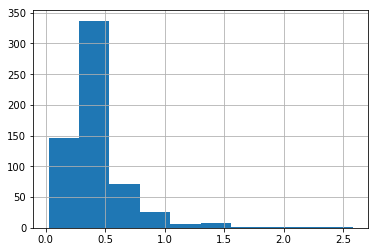

In [318]:
train["Loanpermonth"].hist()

In [316]:
train = train[train["Loanpermonth"] != max(train["Loanpermonth"])]

In [317]:
train.sort_values(by="Loanpermonth", ascending=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loanpermonth
242,1,0,0,0,1,2965,5701.0,155.0,60.0,1.0,0,1,8666.0,2.583333
546,1,0,0,1,1,3358,0.0,80.0,36.0,1.0,-1,0,3358.0,2.222222
68,1,1,3,1,0,7100,0.0,125.0,60.0,1.0,0,1,7100.0,2.083333
585,1,1,1,0,1,4283,3000.0,172.0,84.0,1.0,1,0,7283.0,2.047619
313,1,1,2,0,0,5746,0.0,144.0,84.0,1.0,1,1,5746.0,1.714286
561,0,1,1,0,0,19484,0.0,600.0,360.0,1.0,-1,1,19484.0,1.666667
253,1,1,1,1,1,2661,7101.0,279.0,180.0,1.0,-1,1,9762.0,1.550000
487,1,1,1,0,1,18333,0.0,500.0,360.0,1.0,0,0,18333.0,1.388889
604,0,1,1,0,1,12000,0.0,496.0,360.0,1.0,-1,1,12000.0,1.377778
130,1,0,0,0,0,20166,0.0,650.0,480.0,1.0,0,1,20166.0,1.354167


In [283]:
train = train[train["Loan_Amount_Term"] != min(train["Loan_Amount_Term"])]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc45805a0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc4582a2908>]], dtype=object)

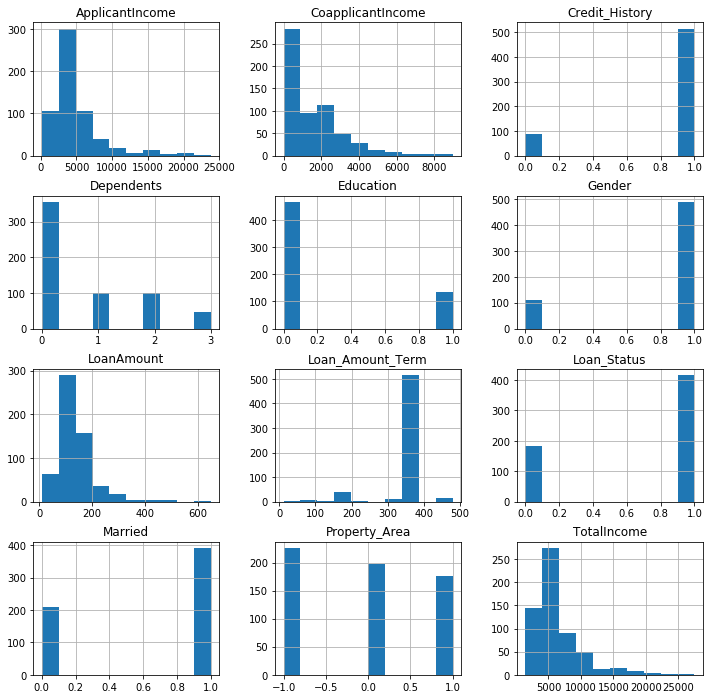

In [154]:
train.hist(figsize=(12,12))

In [175]:
#train["Loanpermonth"] = (train["LoanAmount"]/train["Loan_Amount_Term"])
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loanpermonth
Gender,1.000000,0.363376,0.180405,0.049366,0.002525,0.027362,0.190467,0.105221,-0.082244,0.013352,0.115455,0.018245,0.118362,0.058929
Married,0.363376,1.000000,0.338089,0.014083,0.001372,0.003248,0.230266,0.129395,-0.102974,0.020398,-0.008873,0.097915,0.113905,0.080425
Dependents,0.180405,0.338089,1.000000,0.065934,-0.062707,0.079088,-0.031184,0.107504,-0.091263,-0.016068,0.001413,0.025462,0.062392,0.059105
Education,0.049366,0.014083,0.065934,1.000000,0.010203,-0.172954,-0.043574,-0.162309,-0.080366,-0.077581,0.063517,-0.094655,-0.190186,-0.062912
Self_Employed,0.002525,0.001372,-0.062707,0.010203,1.000000,-0.250507,0.042880,-0.155532,0.041039,0.007462,-0.009219,0.004962,-0.224498,-0.071324
ApplicantIncome,0.027362,0.003248,0.079088,-0.172954,-0.250507,1.000000,-0.200485,0.596701,0.014856,0.056481,0.042491,0.009102,0.882079,0.242717
CoapplicantIncome,0.190467,0.230266,-0.031184,-0.043574,0.042880,-0.200485,1.000000,0.225990,-0.038229,-0.012645,0.062591,0.048400,0.284692,0.137940
LoanAmount,0.105221,0.129395,0.107504,-0.162309,-0.155532,0.596701,0.225990,1.000000,0.102429,0.039282,0.037020,-0.004117,0.692534,0.399678
Loan_Amount_Term,-0.082244,-0.102974,-0.091263,-0.080366,0.041039,0.014856,-0.038229,0.102429,1.000000,-0.010547,-0.018543,-0.019417,-0.003846,-0.486805
Credit_History,0.013352,0.020398,-0.016068,-0.077581,0.007462,0.056481,-0.012645,0.039282,-0.010547,1.000000,-0.035131,0.553154,0.049185,0.043146


In [13]:
train.apply(lambda x: len(x.unique()))

Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [189]:
train.apply(lambda x: sum(x.isnull()))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
Loanpermonth         0
dtype: int64

In [163]:
#train["Loan_Status"] = train["Loan_Status"].map({'Y':1, 'N':0})
#train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
#train["Credit_History"].value_counts()
#train["Education"] = train["Education"].map({'Graduate':0, 'Not Graduate':1})
#train["Education"].value_counts()
#train["Property_Area"] = train["Property_Area"].map({'Urban':0,'Rural':1, 'Semiurban':-1 })
#train["Property_Area"].value_counts()
#train["Married"].fillna(train["Married"].mode()[0], inplace=True)
#train["Married"] = train["Married"].map({"Yes":1, "No":0})
#train["Married"].value_counts()
#train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
#train["Gender"] = train["Gender"].map({"Male": 1, "Female":0})
#train["Gender"].value_counts()
#train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
#train["Loan_Amount_Term"].value_counts()

#train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
#train["Dependents"] = train["Dependents"].map({'0':0, '1':1, '2':2, '3+':3})
#train["Dependents"].value_counts()

#train["LoanAmount"].fillna(train["LoanAmount"].mode()[0], inplace = True)
#train["LoanAmount"].value_counts()
#train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
#train["Self_Employed"] = train["Self_Employed"].map({'No':1, 'Yes':0})
#train["Self_Employed"].value_counts()

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    520
0     80
Name: Self_Employed, dtype: int64

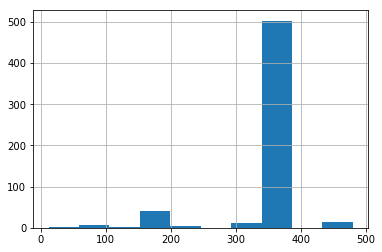

In [103]:
train["Loan_Amount_Term"].hist()

In [105]:
train["Loan_Amount_Term"].mode()[0]

360.0

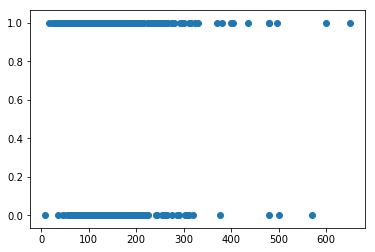

In [98]:
plt.scatter(train["LoanAmount"], train["Loan_Status"])

In [ ]:
train.sort(columns=train["LoanAmount"])

In [35]:
train["Loan_Status"].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [202]:
train = train[train["LoanAmount"] != max(train["LoanAmount"])]

In [203]:
train.sort(columns="LoanAmount", ascending=False)

/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
523,1,1,2,0,0,7948,7166.0,480.0,360.0,1.0,1,1
308,1,0,0,0,1,20233,0.0,480.0,360.0,1.0,1,0
506,1,1,0,0,1,20833,6667.0,480.0,360.0,NaN,0,1
278,1,1,0,0,1,14583,0.0,436.0,360.0,1.0,-1,1
432,1,0,0,0,1,12876,0.0,405.0,360.0,1.0,-1,1
525,1,1,2,0,0,17500,0.0,400.0,360.0,1.0,1,1
372,1,1,2,0,0,9323,7873.0,380.0,300.0,1.0,1,1
325,1,1,1,0,0,8666,4983.0,376.0,360.0,0.0,1,0
126,1,1,3,0,1,23803,0.0,370.0,360.0,1.0,1,1
260,1,1,1,0,1,6083,4250.0,330.0,360.0,NaN,0,1


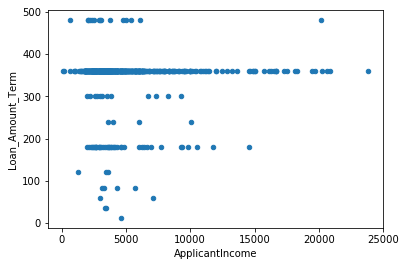

In [126]:
train.plot("ApplicantIncome", "Loan_Amount_Term", kind='scatter')

In [173]:
train = train[train["LoanAmount"] != min(train["LoanAmount"])]

In [173]:
train.sort(columns="Loan_Amount_Term", ascending=False)

/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
366,1,0,0,0,1,2500,0.0,96.0,480.0,1.0,-1,0,2500.0
358,1,1,0,1,1,3000,1666.0,100.0,480.0,0.0,0,0,4666.0
248,1,1,1,0,1,2882,1843.0,123.0,480.0,1.0,-1,1,4725.0
179,1,0,0,1,1,2333,1451.0,102.0,480.0,0.0,0,0,3784.0
573,1,1,2,1,1,6125,1625.0,187.0,480.0,1.0,-1,0,7750.0
500,0,0,0,0,1,645,3683.0,113.0,480.0,1.0,1,1,4328.0
168,1,0,0,0,1,2237,0.0,63.0,480.0,0.0,-1,0,2237.0
130,1,0,0,0,0,20166,0.0,650.0,480.0,1.0,0,1,20166.0
516,0,1,2,0,1,2031,1632.0,113.0,480.0,1.0,-1,1,3663.0
228,1,1,0,0,1,4758,0.0,158.0,480.0,1.0,-1,1,4758.0


In [134]:
train = train[train["Loan_Amount_Term"] != 12.0]

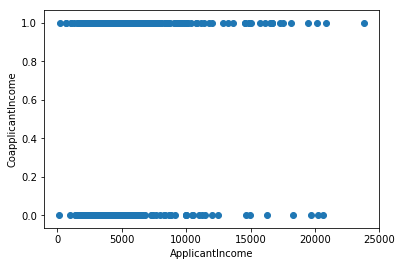

In [117]:
plt.scatter(train["ApplicantIncome"], train["CoapplicantIncome"])
plt.xlabel("ApplicantIncome")
plt.ylabel("CoapplicantIncome")
plt.show()

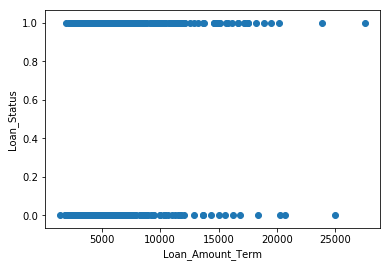

In [119]:
plt.scatter(train["TotalIncome"], train["Loan_Status"])
plt.xlabel("Loan_Amount_Term")
plt.ylabel("Loan_Status")
plt.show()

In [124]:
train.sort(columns="TotalIncome", ascending=False)

/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
506,1,1,0,0,No,20833,6667.0,480.0,360.0,1.0,0,1,27500.0
126,1,1,3+,0,No,23803,0.0,370.0,360.0,1.0,1,1,23803.0
284,1,1,0,0,No,20667,0.0,NaN,360.0,1.0,1,0,20667.0
308,1,0,0,0,No,20233,0.0,480.0,360.0,1.0,1,0,20233.0
130,1,0,0,0,Yes,20166,0.0,650.0,480.0,1.0,0,1,20166.0
561,0,1,1,0,Yes,19484,0.0,600.0,360.0,1.0,-1,1,19484.0
478,1,1,1,0,Yes,16667,2250.0,86.0,360.0,1.0,-1,1,18917.0
487,1,1,1,0,No,18333,0.0,500.0,360.0,1.0,0,0,18333.0
534,0,0,0,1,Yes,18165,0.0,125.0,360.0,1.0,0,1,18165.0
475,1,1,2,0,Yes,16525,1014.0,150.0,360.0,1.0,1,1,17539.0


In [123]:
train = train[train["TotalIncome"] != 24996.0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77818d7a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77827d8240>]], dtype=object)

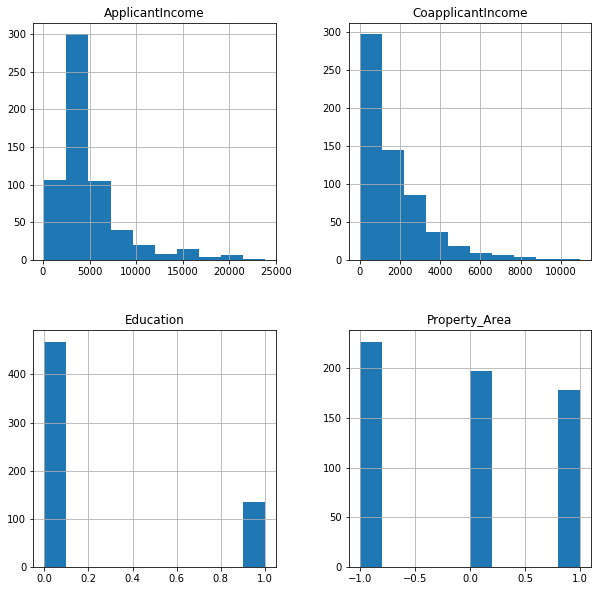

In [64]:
train.hist(column=["ApplicantIncome", "CoapplicantIncome", "Education", "Property_Area"], figsize=(10,10))

In [63]:
train["TotalIncome"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

In [ ]:
#removing skewness
#train = train1
#train["ApplicantIncome"] = np.log10((train1["ApplicantIncome"]) + 1)
#train["CoapplicantIncome"] = np.log10((train1["CoapplicantIncome"]) + 1)

In [ ]:
train1.sort(columns="CoapplicantIncome", ascending=True)

In [ ]:
train.sort(columns="CoapplicantIncome", ascending=False)

In [56]:
train = train[train["ApplicantIncome"] != max(train["ApplicantIncome"])]
#train1 = train1[train1["ApplicantIncome"] != max(train1["ApplicantIncome"])]


In [57]:
train.shape

(601, 12)

In [49]:
train = train[train["CoapplicantIncome"] != max(train["CoapplicantIncome"])]
#train1 = train1[train1["CoapplicantIncome"] != max(train1["CoapplicantIncome"])]
#train[train["CoapplicantIncome"] == max(train["CoapplicantIncome"])]

In [ ]:
train["CoapplicantIncome"].isnull().sum()

In [39]:
#converting loan status into integer
train["Loan_Status"] = train["Loan_Status"].map({'Y':1, 'N':0})

In [36]:
train.shape

(604, 12)

In [ ]:
#train1[train1["CoapplicantIncome"] != min(train1["CoapplicantIncome"])]

In [42]:
train["Loan_Status"].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [73]:
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Married"] = train["Married"].map({"Yes":1, "No":0})
train["Married"].value_counts()

1    392
0    209
Name: Married, dtype: int64

In [37]:
import xgboost as xgb

/home/rahul/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
param = {'eta': 0.1,
 'eval_metric': 'auc',
 'max_depth': [2,3,5,7,9],
 'nthread': 4,
 'min_child_weight' : [1,3,5,7], 
 #'objective': 'reg:logistic',
 'objective': 'binary:logistic',
 'silent': 1}
param

{'eta': 0.1,
 'eval_metric': 'auc',
 'max_depth': [2, 3, 5, 7, 9],
 'min_child_weight': [1, 3, 5, 7],
 'nthread': 4,
 'objective': 'binary:logistic',
 'silent': 1}

In [208]:
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':21, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
cv_params = {'max_depth': [7,9,11], 'min_child_weight': [5,7,9], 'subsample' :[0.8]}

In [40]:
#grid search cv
from sklearn.grid_search import GridSearchCV

/home/rahul/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [209]:
opt = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 


In [210]:
opt.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [7, 9, 11], 'min_child_weight': [5, 7, 9], 'subsample': [0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)>

In [319]:
opt.fit(train[["ApplicantIncome","CoapplicantIncome", "Credit_History", "Education", "Property_Area","Dependents",\
 "Gender", "Married", "Loanpermonth","Self_Employed"]],       train["Loan_Status"])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [7, 9, 11], 'min_child_weight': [5, 7, 9], 'subsample': [0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [321]:
opt.grid_scores_

[mean: 0.77592, std: 0.02311, params: {'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.8},
 mean: 0.77425, std: 0.02400, params: {'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.8},
 mean: 0.76589, std: 0.02287, params: {'max_depth': 7, 'min_child_weight': 9, 'subsample': 0.8},
 mean: 0.77258, std: 0.02234, params: {'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8},
 mean: 0.77425, std: 0.02400, params: {'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.8},
 mean: 0.76589, std: 0.02287, params: {'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.8},
 mean: 0.77258, std: 0.02234, params: {'max_depth': 11, 'min_child_weight': 5, 'subsample': 0.8},
 mean: 0.77425, std: 0.02400, params: {'max_depth': 11, 'min_child_weight': 7, 'subsample': 0.8},
 mean: 0.76589, std: 0.02287, params: {'max_depth': 11, 'min_child_weight': 9, 'subsample': 0.8}]

In [187]:
opt.best_params_

{'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8}

In [320]:
opt.best_score_

0.7759197324414716

In [322]:
#getting final optimal score
opt_final = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)

#k = ["ApplicantIncome","CoapplicantIncome", "Credit_History", "Education", "Property_Area","Dependents",\
 # "LoanAmount", "Loan_Amount_Term","Gender", "Married", "Loanpermonth","Self_Employed"]

opt_final.fit(train[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]], train["Loan_Status"])
opt_final.best_params_
opt_final.best_score_

0.7976588628762542

In [342]:
opt_final.best_params_

{'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8}

# test

In [373]:
test = pd.read_csv(r"/home/rahul/ml_stuff/AV/loan prediction 3/test_Y3wMUE5_7gLdaTN.csv")

In [374]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [375]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [376]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [377]:
test.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [255]:
#test = test[test["ApplicantIncome"] != max(test["ApplicantIncome"])]
#test = test[test["CoapplicantIncome"] != max(test["CoapplicantIncome"])]


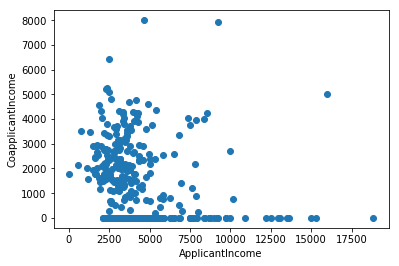

In [256]:
plt.scatter(test["ApplicantIncome"], test["CoapplicantIncome"])
plt.xlabel("ApplicantIncome")
plt.ylabel("CoapplicantIncome")
plt.show()

In [ ]:
#train["Loan_Status"] = train["Loan_Status"].map({'Y':1, 'N':0})
#train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
#train["Credit_History"].value_counts()
#train["Education"] = train["Education"].map({'Graduate':0, 'Not Graduate':1})
#train["Education"].value_counts()
#train["Property_Area"] = train["Property_Area"].map({'Urban':0,'Rural':1, 'Semiurban':-1 })
#train["Property_Area"].value_counts()
#train["Married"].fillna(train["Married"].mode()[0], inplace=True)
#train["Married"] = train["Married"].map({"Yes":1, "No":0})
#train["Married"].value_counts()
#train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
#train["Gender"] = train["Gender"].map({"Male": 1, "Female":0})
#train["Gender"].value_counts()
#train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
#train["Loan_Amount_Term"].value_counts()

#train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
#train["Dependents"] = train["Dependents"].map({'0':0, '1':1, '2':2, '3+':3})
#train["Dependents"].value_counts()

#train["LoanAmount"].fillna(train["LoanAmount"].mode()[0], inplace = True)
#train["LoanAmount"].value_counts()
#train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
#train["Self_Employed"] = train["Self_Employed"].map({'No':1, 'Yes':0})
#train["Self_Employed"].value_counts()

In [378]:
test["LoanAmount"].fillna(test["LoanAmount"].mode()[0], inplace = True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace = True)
#test = test[test["Loan_Amount_Term"] != min(test["Loan_Amount_Term"])]
test["Loanpermonth"] = (test["LoanAmount"]/test["Loan_Amount_Term"])
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace=True)
test["Property_Area"] = test["Property_Area"].map({'Urban':0,'Rural':1, 'Semiurban':-1 })
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace=True)
test["Self_Employed"] = test["Self_Employed"].map({'No':1, 'Yes':0})


In [ ]:
train[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]]

In [336]:
xgdmat = xgb.DMatrix(train[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]], train["Loan_Status"])

In [337]:
#early stopping CV

In [355]:
our_params = {'eta': 0.05, 'seed':21, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':9, 'min_child_weight':5} 
# Grid Search CV optimized settings


In [356]:

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 500) # Look for early stopping that minimizes error

In [357]:
cv_xgb.head(10)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.394958,0.070908,0.297059,0.012786
1,0.243697,0.088455,0.215546,0.055306
2,0.208403,0.051364,0.188235,0.009070
3,0.181513,0.035493,0.176050,0.006147
4,0.179832,0.037430,0.178571,0.007861


In [351]:
#need to check on this
#final_gb = xgb.train(our_params, xgdmat, num_boost_round = 500)

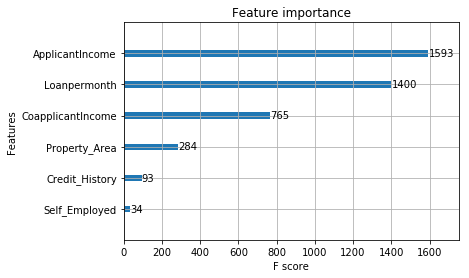

In [352]:
xgb.plot_importance(final_gb)

In [358]:
importances = final_gb.get_fscore()
importances

{'ApplicantIncome': 1593,
 'CoapplicantIncome': 765,
 'Credit_History': 93,
 'Loanpermonth': 1400,
 'Property_Area': 284,
 'Self_Employed': 34}

In [359]:
testdmat = xgb.DMatrix(train[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]])

In [366]:
xgb.XGBClassifier?

In [362]:
predicted.shape

(598,)

In [367]:
model = xgb.XGBClassifier(max_depth=9, learning_rate=0.1, n_estimators=100, objective='binary:logistic',\
            nthread=-1, gamma=0, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, \
                          colsample_bylevel=1, seed=21)
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.8)

In [368]:
model.fit?

In [369]:
model.fit(train[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]], train["Loan_Status"])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=5, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.8)

In [383]:
predicted = model.predict(test[["ApplicantIncome","CoapplicantIncome", "Credit_History",  "Property_Area",\
         "Loanpermonth","Self_Employed"]])

In [384]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [404]:
sample_submission = pd.DataFrame()
some = pd.Series(predicted)
sample_submission = pd.concat([test["Loan_ID"], some], axis=1)
sample_submission.columns = ["Loan_ID", "Loan_Status"]
sample_submission["Loan_Status"] = sample_submission["Loan_Status"].map({1: "Y", 0: "N"})

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/indexes/api.py:71: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [405]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [409]:
sample_submission.to_csv(r"/home/rahul/ml_stuff/AV/loan prediction 3/sample_submission.csv", index=None)

In [416]:
sample_submission.shape

(367, 2)

In [415]:
sample_submission = sample_submission[:367]